![Advertising](img/advertising.jpeg)

**Prédire les ventes à partir des investissements publicitaires**

**Contexte** :

Une entreprise souhaite mieux comprendre l’impact de ses dépenses publicitaires sur ses ventes. Elle dispose d’un jeu de données ([`data/advertising.csv`](data/advertising.csv)) comprenant les montants investis dans trois canaux de communication (TV, radio, presse écrite) ainsi que les ventes correspondantes. Vous êtes chargé·e d’exploiter ces données pour construire un modèle de prédiction fiable.

⸻

🎯 **Objectif** :

Construire un modèle de régression linéaire permettant de prédire les ventes en fonction des investissements publicitaires dans les trois médias, en suivant un pipeline de modélisation complet.

- Exploration des données (EDA) :
    - Analyse descriptive
    - Visualisation des relations entre variables
    - Identification des corrélations
- Préparation des données :
    - Nettoyage des données (valeurs manquantes, outliers)
    - Normalisation ou standardisation si nécessaire
    - Séparation train/test
- Modélisation :
    - Implémentation d’un modèle de régression linéaire
- Évaluation :
    - Utilisation de métriques pertinentes : RMSE, R², MAE
- Intégration simple du modèle dans un script interactif
    - Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

# Import lib

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
import joblib


# 1. Exploration des données (EDA) :
    - Analyse descriptive
    - Visualisation des relations entre variables
    - Identification des corrélations



In [47]:
# Loading
df = pd.read_csv("data/advertising.csv")

## Analyse descriptive

In [48]:
# Exploration
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [49]:
# Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [50]:
# Analyse descriptive
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualisation des relations entre variables

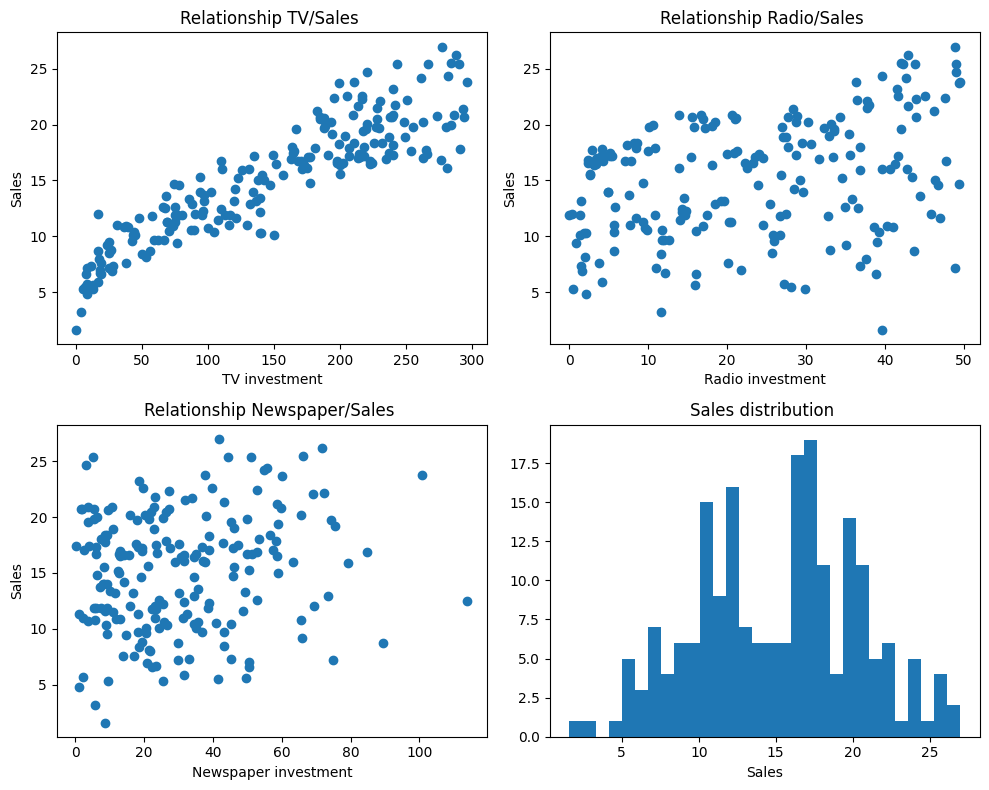

In [51]:
# Visualisation des relations entre variables

plt.figure(figsize=(10,8))

# Premier graphique (en haut à gauche) : diagramme en barres
plt.subplot(2,2,1)                                  # 2 lignes, 2 colonnes, 1er sous-graphe
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV investment")
plt.ylabel("Sales")
plt.title("Relationship TV/Sales ")

# Deuxième graphique (en haut à droite) : nuage de points (scatter plot)
plt.subplot(2,2,2)                                  # 2 lignes, 2 colonnes, 2e sous-graphe
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio investment")
plt.ylabel("Sales")
plt.title("Relationship Radio/Sales ")

# Troisième graphique (en bas à gauche) : histogramme
plt.subplot(2,2,3)                                  # 2 lignes, 2 colonnes, 3e sous-graphe
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper investment")
plt.ylabel("Sales")
plt.title("Relationship Newspaper/Sales ")

# Quatrième graphique (en bas à droite) : diagramme circulaire (camembert)
plt.subplot(2,2,4)                                  # 2 lignes, 2 colonnes, 4e sous-graphe
plt.hist(df["Sales"], bins = 30)
plt.xlabel("Sales")

plt.title("Sales distribution ")
# Ajuste automatiquement les espacements entre les sous-graphes pour éviter les chevauchements
plt.tight_layout()

# Affiche l’ensemble des graphiques
plt.show()


type per_TV <class 'int'>


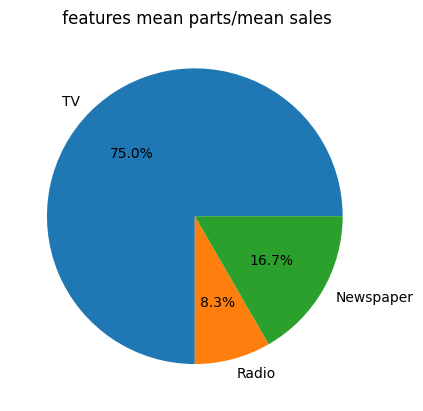

In [52]:
mean_investement_TV = df["TV"].mean()
mean_investement_Radio = df["Radio"].mean()
mean_investement_Newspaper = df["Newspaper"].mean()
mean_sales=df["Sales"].mean()
per_TV = mean_investement_TV/mean_sales
print("type per_TV",type(int(per_TV)))
per_Radio = mean_investement_Radio/mean_sales
per_Newspaper = mean_investement_Newspaper/mean_sales

list_features_names = ["TV","Radio","Newspaper"]
list_features_names 
list_features_percent = [int(per_TV),int(per_Radio),int(per_Newspaper)]
list_features_percent 
plt.pie(list_features_percent,labels = list_features_names, autopct='%1.1f%%')
plt.title(" features mean parts/mean sales")
plt.show()


## Identification des corrélations

In [53]:
# Identification des corrélations
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# 2. Préparation des données :

- Préparation des données :
    - Nettoyage des données (valeurs manquantes, outliers)
    - Normalisation ou standardisation si nécessaire
    - Séparation train/test

## Nettoyage des données (valeurs manquantes, outliers)

In [54]:
df.isna().any().sum()

np.int64(0)

## Normalisation ou standardisation si nécessaire

In [55]:
X = df.drop("Sales",axis=1)
X
y = df[["Sales"]]
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


## Séparation train/test

In [57]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,train_size=0.2, random_state=42)

# 3. Modélisation :
    

## Implémentation d’un modèle de régression linéaire


In [58]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

# 4. Évaluation :
## Utilisation de métriques pertinentes : RMSE, R², MAE


In [59]:
y_pred = linreg.predict(X_test)

In [60]:
# RMSE, R², MAE

mse = mean_squared_error(y_test,y_pred) 
print("mse",mse)
rmse = np.sqrt(mse)
print("rmse",rmse)
r2 = r2_score(y_test,y_pred)
print("r2",r2)

mae = mean_absolute_error(y_test,y_pred)
print("mae",mae)

mse 0.10307390293438437
rmse 0.32105124658593737
r2 0.895132063806193
mae 0.2484617227259383


## Visualisation des prédictions

In [63]:

# Code
print(X_test.shape)
print(y_test.shape)


(160, 3)
(160, 1)


In [81]:
X_test[:,0].reshape(-1,1)


array([[ 0.18983684],
       [ 0.56466461],
       [ 1.70316018],
       [-1.58037782],
       [ 0.85541887],
       [-0.84006377],
       [ 0.81454979],
       [-1.1331534 ],
       [ 0.87994031],
       [ 0.327624  ],
       [-1.34917564],
       [-1.06075676],
       [ 1.02123053],
       [-1.65394214],
       [-0.08807285],
       [ 0.27040729],
       [-1.63175608],
       [ 0.59035374],
       [-0.8377284 ],
       [ 1.05509347],
       [ 0.96284614],
       [-0.92530498],
       [-1.27327593],
       [ 1.21273132],
       [-0.91129272],
       [-1.09228433],
       [ 0.7760161 ],
       [-0.09040823],
       [-0.69877355],
       [-1.61891151],
       [ 0.61604287],
       [-0.90895735],
       [ 0.60553368],
       [-1.51965805],
       [ 1.56070228],
       [ 1.06443498],
       [-1.15300409],
       [ 1.47896413],
       [-0.34846722],
       [-1.39588315],
       [-0.36247947],
       [ 0.34981006],
       [-1.21372386],
       [-0.98952781],
       [ 0.89862331],
       [-1

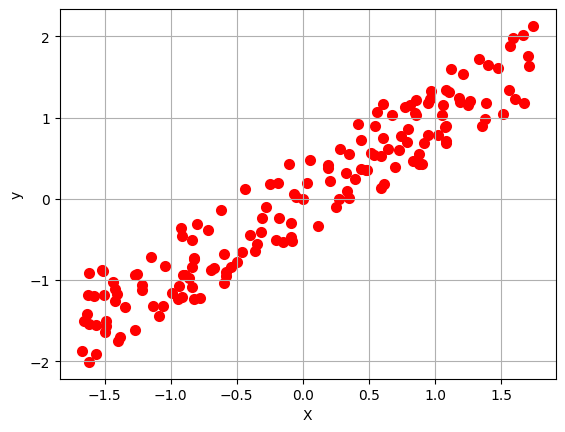

In [84]:
#plt.scatter(X_test[:,0].reshape(-1,1), y_test, color="blue", label="Actual")
plt.scatter(X_test[:,0].reshape(-1,1), y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

# 5. Intégration simple du modèle dans un script interactif


## Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

In [ ]:
# Save model and scaler
joblib.dump({'model': linreg, 'scaler': scaler}, 'linear_model_and_scaler.pkl')

In [ ]:
# Load model and scaler
loaded = joblib.load('linear_model_and_scaler.pkl')

loaded_model = loaded['model']
loaded_scaler = loaded['scaler']

# Example usage
#X_new_scaled = loaded_scaler.transform(X_new)
#y_pred = loaded_model.predict(X_new_scaled)